In [21]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as st
import pandas as pd
import seaborn as sns
import time
from tqdm import tqdm
import itertools

In [2]:
# перестановочный критерий
from permute.core import one_sample

# бутстрап
from arch.bootstrap import IIDBootstrap

#критерий знаков
from statsmodels.stats.descriptivestats import sign_test

In [97]:
data = pd.read_csv('homework_data/sem_3/zhiboedova.aa.csv', header=None)
#data = pd.read_csv('homework_data/sem_3/kobzeva.an.csv', header=None)
x = data.values.reshape(data.size,)
print('sample size = {},\n{}'.format(data.size, x))

sample size = 12,
[-2.2107557  -2.64335542 -2.04576018 -2.33678248 -2.79145577 -2.74376135
  2.930852    2.70928331  1.54428567  2.9190273  -0.16641343  3.16705274]


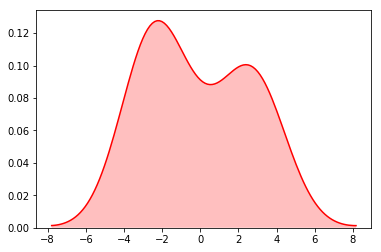

In [98]:
sns.kdeplot(x, shade=True, color='r')

Поскольку выборка двупиковая, ее нельзя приблизить нормальным распредлением. Поэтому применение t-критерия Стьюдента невозможно. 
#### Критирий Уилкоксона (m0=0)

In [99]:
%%time
st.wilcoxon(x)

CPU times: user 860 µs, sys: 747 µs, total: 1.61 ms
Wall time: 1.46 ms


WilcoxonResult(statistic=36.0, pvalue=0.8139453463016609)

#### Критерий знаков

In [100]:
%%time
p_value = sign_test(x, mu0=0)[1]
print("p_value для критерия знаков = ", p_value)

p_value для критерия знаков =  0.7744140625000003
CPU times: user 1.1 ms, sys: 650 µs, total: 1.75 ms
Wall time: 1.53 ms


__Критерий перестановки__

In [101]:
resp = list(itertools.product([-1, 1], repeat=x.size))
print("Число перестановок = ", len(resp))

Число перестановок =  4096


In [102]:
t = np.sum(x - 0.5)
print('Значение статистики для представленной выборки: t = {}'.format(t))

Значение статистики для представленной выборки: t = -7.667783321003633


In [103]:
%%time
T = x - 0.5
stats = []
equal_t = 0
for i, v in enumerate(resp):
    stats.append(np.dot(T, v))
    equal_t = equal_t + 1 if stats[i] <= t else equal_t
print('Число перестановок со статистикой меньше или равной статистике по оригинальной выборке = {}'.format(equal_t))

Число перестановок со статистикой меньше или равной статистике по оригинальной выборке = 785
CPU times: user 66.7 ms, sys: 10.4 ms, total: 77.1 ms
Wall time: 78.3 ms


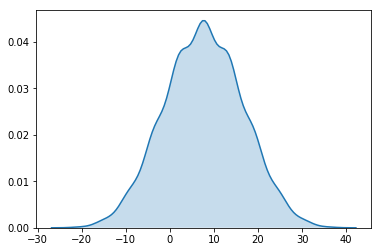

In [107]:
sns.kdeplot(stats - t, shade=True)

In [105]:
%%time
test_values_0 = one_sample(x - 0.5)
print("p_value для перестановочного критерия = {} \nstatistic = {}".format(test_values_0[0], test_values_0[1]))

p_value для перестановочного критерия = 0.8087119128808712 
statistic = -0.6389819434169693
CPU times: user 5.16 s, sys: 97.3 ms, total: 5.26 s
Wall time: 5.44 s


In [106]:
x_values = []
p_values = []
statistics = []
for i in tqdm(range(100)):
    x_values.append(i)
    test_values = one_sample(x - 0.5, reps = i, stat='t')
    p_values.append(test_values[0])
    statistics.append(test_values[1])

100%|██████████| 100/100 [00:01<00:00, 63.94it/s]


#### Бутстрэп
Доверительные интервалы

In [85]:
bs = IIDBootstrap(x)
sigma = bs.conf_int(np.mean, 1000, method='basic').reshape(2,)
print('Левый доверительный интервал = {}, Правый = {}'.format(sigma[0], sigma[1]))

Левый доверительный интервал = -1.5593422372758665, Правый = 1.1748390994714073
